In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1. Wigner semi-circle law for random matrix mixture

Here we're going to demonstrate the accuracy of the Wigner semi-circle distribution even when we have a matrix whose matrix elements are drawn from a mixture distribution. We will calculate the matrix $\underline{\underline{M}}$ from the matrix $\underline{\underline{A}}$ as follows,

$$\underline{\underline{M}}\;=\;\frac{1}{2} \left ( \underline{\underline{A}} + \underline{\underline{A}}^{\top} \right )$$

The matrix elements $A_{ij}$ are drawn from a mixture of the standard Normal distribution $N(0,1)$ and a zero-mean unit-variance Laplace distribution. We'll use the numpy.random.laplace function to generate random numbers from a Laplace distribution for us. To ensure the Laplace distribution has zero mean and a variance of 1, we'll set the 'loc' argument of the numpy.random.laplace function to 0.0 and the 'scale' argument of the function to $1/\sqrt{2}$.

Overall, this means that the matrix element $A_{ij}$ is distribution as follows:

$$ A_{ij}\;\sim\;n_{ij} \times {\rm Normal}(0,1)\;+\;\left (1 - n_{ij}\right )\times {\rm Laplace}(\lambda = 1/\sqrt{2})$$

where,

$$ n_{ij}\;\sim\; {\rm Bernoulli}\left ( \frac{1}{2}\right )$$

The matrix elements $A_{ij}$ will also have a mean of 0 and variance of 1.

Let's start by creating our $\underline{\underline{A}}$ matrix.

In [2]:
# Set the seed of the numpy pseudo-random number generator
# This will ensure we get reproducible outputs
np.random.seed(10984)

This next cell may take a few seconds to run, as this is where we are creating the $2000 \times 2000 = 4 \times 10^{6}$ matrix elements of $\underline{\underline{A}}$.

In [3]:
## Create the A matrix

# Set the number of matrix elements
n_elements = 2000

# Sample the matrix elements from an equal weight 
# mixture of the standard Normal distribution and 
# the zero-mean unit variance Laplace distribution
A = np.zeros((n_elements, n_elements))

for i in range(n_elements):
    for j in range(n_elements):
        if np.random.rand(1) < 0.5:
            A[i,j] = np.random.randn()
        else:
            A[i,j] = np.random.laplace(loc=0.0, scale=1.0/np.sqrt(2.0))

Now we'll create the $\underline{\underline{M}}$ matrix.

In [4]:
## Create the M matrix
M = 0.5*(A + np.transpose(A)) 

Next we calculate the eigenvalues of the matrix $\underline{\underline{M}}$. We'll use a function from np.linalg to do that for us. Since we are only interested in the eigenvalues of $\underline{\underline{M}}$ and not its eigenvectors we can make use of numpy.linalg.eigvals or numpy.linalg.eigvalsh . Since our matrix $\underline{\underline{M}}$ is real and symmetric it is Hermitian, so we'll use numpy.linalg.eigvalsh since this should provide a more efficient calculation of the eigenvalues of $\underline{\underline{M}}$

In [5]:
# Calculate the eigenvalues of the M matrix
eigvals = np.linalg.eigvalsh(M)

Now we'll calculate the scaled eigenvalues. We use the scaling appropriate to the Gaussian Orthogonal Ensemble (GOE)

In [6]:
# Calculate the scaled eigenvalues
scaled_eigvals = eigvals / np.sqrt(n_elements)

Finally we can plot the density of the scaled eigenvalue, as estimated by a simple histogram plot, and compare it to the Wigner semi-circle distribution. First we'll define a function to compute the Wiger semi-circle function for us.

In [7]:
# Wigner semi-circle distribution function
def wigner_semicircle(x):
    '''
    :param x: The scaled eigenvalue at which we want 
              to compute the Wigner probability density
              function
    :type x: float
    
    :returns: The Wigner semi-circle probability density
    :rtype: float
    '''
    
    # Square the scaled eigenvalue
    x_squared = np.power(x, 2.0)
    
    # Check if the scaled eigenvalue is 
    # within the support of the semi-circle function
    if x_squared < 2.0:
        return np.sqrt(2.0 - x_squared)/np.pi
    else:
        return 0.0

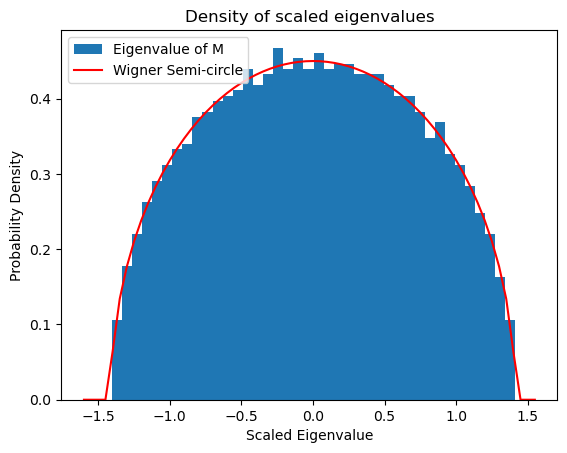

In [8]:
# Plot histogram of the observed scaled eigenvalues
# and overlay the Wigner semi-circle function
eigvals_hist = plt.hist(scaled_eigvals, bins=40, density=True, label="Eigenvalue of M")
x_vals = np.arange(start = -1.6, stop=1.6, step=0.05)
semicircle_vals = np.array([wigner_semicircle(x) for x in x_vals])
plt.plot(x_vals, semicircle_vals, color='red', label="Wigner Semi-circle")
plt.title('Density of scaled eigenvalues')
plt.xlabel('Scaled Eigenvalue')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

We can see the Wigner semi-circle distribution is a really good approximation to the density of scaled eigenvalues from $\underline{\underline{M}}$, even though the elements of $\underline{\underline{M}}$ even though the matrix elements of $\underline{\underline{M}}$ have been generated from a mixture of a Normal distribution and a Laplace distribution. 

## Q2.  Gaussian Unitary Example

Here we are going to sample a matrix from the Gaussian Unitary Ensemble (GUE) and compare the density of its scaled eigenvalues to the Wigner semi-circle distribution. This example is very similar to Q1, except we will generate the matrix in a slightlty different way and the matrix elements are now complex numbers. However, because of the similarities to the answer in Q1, we can re-use alot of the code from Q1.

Let's create our $\underline{\underline{A}}$ matrix.

In [9]:
## Create the A matrix

# Set the number of matrix elements
n_elements = 2000

# Sample the matrix elements as complex numbers
# whose real and imaginary parts are drawn from the 
# standard Normal distribution.
# Notice the type we have used when instantiating the matrix
A_GUE = np.empty((n_elements, n_elements), dtype=complex) 

for i in range(n_elements):
    for j in range(n_elements):
        A_GUE[i,j] = complex(np.random.randn(), np.random.randn())

Now we'll create the $\underline{\underline{M}}$ matrix from $\underline{\underline{A}}$ and the Hermitian conjugate of $\underline{\underline{A}}$.

In [10]:
## Create the M matrix
M_GUE = 0.5*(A_GUE + np.transpose(np.conjugate(A_GUE)))

Now we can compute the eigenvalues. Again we will use the function numpy.linalg.eigvalsh . We can do this because the matrix $\underline{\underline{M}}$ is still Hermitian.

In [11]:
# Calculate the eigenvalues of the M matrix
eigvals_GUE = np.linalg.eigvalsh(M_GUE)

Now we compute the scaled eigenvalues. Notice we divide by $1/\sqrt{2N}$ because $\beta=2$ for the GUE - see the main text of Chapter 15.

In [12]:
# Calculate the scaled eigenvalues
scaled_eigvals_GUE = eigvals_GUE / np.sqrt(2.0*n_elements)

Now we'll plot the density of the scaled eigenvalue, as estimated by a simple histogram plot, and compare it to the Wigner semi-circle distribution.

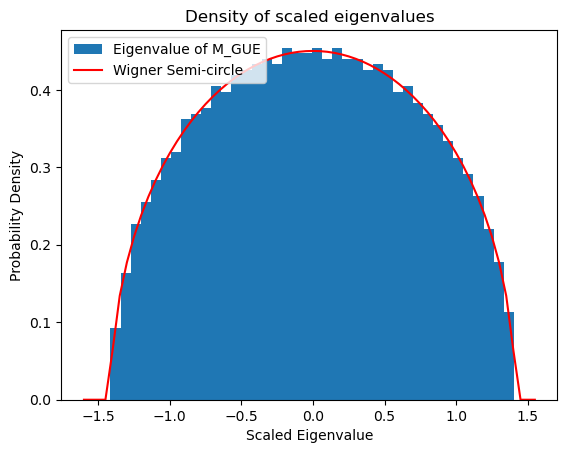

In [13]:
# Plot histogram of the observed scaled eigenvalues
# and overlay the Wigner semi-circle function
eigvals_GUE_hist = plt.hist(scaled_eigvals_GUE, bins=40, density=True, label="Eigenvalue of M_GUE")
x_vals = np.arange(start = -1.6, stop=1.6, step=0.05)
semicircle_vals = np.array([wigner_semicircle(x) for x in x_vals])
plt.plot(x_vals, semicircle_vals, color='red', label="Wigner Semi-circle")
plt.title('Density of scaled eigenvalues')
plt.xlabel('Scaled Eigenvalue')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Again, the density of scaled eigenvalues from this GUE matrix is very well approximated by the Wigner semi-circle function.

## Q3. Derivation of density of singular values of a data matrix 

The singular values $w$ of a $N\times d$ centered data matrix $\underline{\underline{X}}$ are related to the eigenvalues, $\lambda$, of the sample covariance matrix $\hat{\underline{\underline{C}}} = \frac{1}{N-1} \underline{\underline{X}}^{\top}\underline{\underline{X}}$ via the relationship $\lambda = w^{2}/(N-1)$. We will assume that the singular values $w$ are positive, so the inverse relationship $w = \sqrt{(N-1)\lambda}$ is a monotonic relationship.

This means that from rules of transforming probability density functions that we learnt about in Chapter 2, the density, $p_{W}(w)$, of singular values is related to the density, $p_{\Lambda}(\lambda)$, of eigenvalues via the following:

$$ p_{W}\left ( w\right ) = p_{\Lambda}\left ( \frac{w^{2}}{N-1}\right ) \times \frac{d\lambda}{dw}\;=\;\frac{2w}{N-1}\,p_{\Lambda}\left ( \frac{w^{2}}{N-1}\right )$$

Now,the density $p_{\Lambda}(\lambda)$ is given by the Marcenko-Pastur distribution in Eq.11 of the main text in Chapter 15. Substituing in Eq.11 from Chapter 15 we get the following:

$$p_{W}\left ( w\right ) = \frac{\alpha}{\pi w} \sqrt{\left ( \lambda_{+} - \frac{w^{2}}{N-1}\right ) \left (\frac{w^{2}}{N-1} - \lambda_{-} \right )}\;\;\; {\rm if}\; \frac{w^{2}}{N-1}\in [\lambda_{-},\lambda_{+}] $$

and 

$$p_{W}\left ( w\right ) = 0\;\;\; {\rm if}\; \frac{w^{2}}{N-1}\notin [\lambda_{-},\lambda_{+}]$$

and where $\alpha = N/d$, and $\lambda_{-}$ and $\lambda_{+}$ are given in Eq.12 in Chapter 15, and defined as follows:

$$\lambda_{-}\;=\;\left ( 1 - \frac{1}{\sqrt{\alpha}}\right )^{2}\;\;\;,\;\;\;\lambda_{+}\;=\;\left ( 1 + \frac{1}{\sqrt{\alpha}}\right )^{2}$$.

We can simplify the above expressions by introducing $w^{2}_{-} = \left ( \sqrt{N-1}\;-\;\sqrt{d\left (1-\frac{1}{N} \right )}\right )^{2}$ and $w^{2}_{+} = \left ( \sqrt{N-1}\;+\;\sqrt{d\left (1-\frac{1}{N} \right )}\right )^{2}$. If we do so, we get the following (after a bit of simple algebra):

$$p_{W}\left ( w\right )\;=\;\frac{\alpha}{\pi(N-1)w} \sqrt{\left ( w^{2}_{+} - w^{2}\right ) \left (w^{2} - w^{2}_{-} \right )}\;\;\; {\rm if}\; w^{2}\in [w^{2}_{-},w^{2}_{+}]$$

and 

$$p_{W}\left ( w\right ) = 0\;\;\; {\rm if}\; w^{2}\notin [w^{2}_{-},w^{2}_{+}]$$

Let's test this formual with a quick simulation.

We will generate a data matrix $\underline{\underline{X}}$ as an $N\times d$ matrix of values drawn from the standard Normal distribution $N(0,1)$. 

In [14]:
# Create a large N x d matrix with elements drawn from Normal(0,1)
N = 8000
d = 800
X_mat = np.random.randn(N, d)

Now compute the singular values using the numpy.linalg.svd function. Since we are only interested in the singular values and not the singular vectors we can set the compute_uv option to False in the function call.

In [15]:
# Compute the singular values
singular_vals = np.linalg.svd(X_mat, compute_uv = False)

Now we plot the density of singular values and compare it to the formula we just derived. First we'll define a function to compute that formula we derived

In [16]:
# Define a function to calculate the density of singular values
# of a data matrix, assuming the sample covariance matrix derived 
# from that data matrix has eigenvalues that follow the Marcenko-Pastur distribution

def calc_density_singular_MP(w, N, d):
    '''
    :param w: The singular value for which we want 
              to calculate the probability density
    :type w: float
    
    :param N: The number of rows in the data matrix
    :type N: int
    
    :param d: The number of columns in the data matrix
    :type d: int
    
    :returns: The probability density function we derived
    :rtype: float
    '''
    
    # Define constants
    alpha = float(N)/float(d)
    w2_plus = np.power(np.sqrt(N-1.0) + np.sqrt(d*(1.0 - (1.0/N))), 2.0)
    w2_minus = np.power(np.sqrt(N-1.0) - np.sqrt(d*(1.0 - (1.0/N))), 2.0)
    
    # See if the singular value is within the support of the 
    # distribution and then calculate the density accordingly
    w2 = np.power(w, 2.0)
    if (w2 <= w2_minus) | (w2 >= w2_plus):
        return 0.0
    else:
        density = alpha*np.sqrt((w2_plus-w2)*(w2-w2_minus))/(np.pi*w*(N-1))
        return density

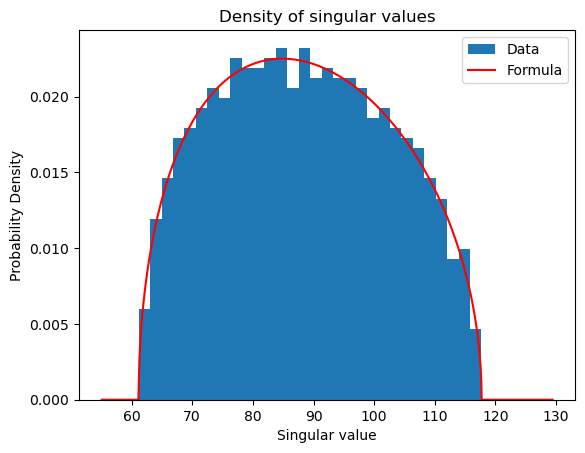

In [17]:
# Plot histogram of the observed singular values
# and overlay the formula we derived
plt.hist(singular_vals, bins=30, density=True, label="Data")
w_vals = np.arange(start = 0.9*np.min(singular_vals),
                   stop = 1.1*np.max(singular_vals),
                   step = (np.max(singular_vals)-np.min(singular_vals))/1000.0)
singular_density_vals = np.array([calc_density_singular_MP(w, N=N, d=d) for w in w_vals])
plt.plot(w_vals, singular_density_vals, color='red', label="Formula")
plt.title('Density of singular values')
plt.xlabel('Singular value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

We can see that the formula we have derived is a good approximation to the density of observed singular values.